In [2]:
#Importing Libraries
import requests
from bs4 import BeautifulSoup as soup
import numpy as np
import pandas as pd
from goose3 import Goose
from mitie import *
from collections import defaultdict
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()
from pandas import plotting

In [3]:
#!/usr/bin/python
#
# This example shows how to use the MITIE Python API to perform named entity
# recognition and also how to run a binary relation detector on top of the
# named entity recognition outputs.
#
import sys, os
import os.path
# Make sure you put the mitielib folder into the python search path.  There are
# a lot of ways to do this, here we do it programmatically with the following
# two statements:
#parent = os.path.dirname(os.path.realpath(_file_))


from mitie import *
from collections import defaultdict

#ner_model_path = os.path.abspath('../../../mitie/mitielib')

mitie_lib = os.path.abspath('../../mitielib') 
mitie_model = '/Users/claudiogimenestoledo/Documents/GitHub/MIT Data Science and Big Data Analytics Making Data Driven Decisions/My Projects/SPECTRAL CLUSTERING NEW STORIES/MITIE-models/english'
mitie_model += '/ner_model.dat'

sys.path.append(mitie_lib)


print("loading NER model...")
ner = named_entity_extractor(mitie_model)
print("\nTags output by this NER model:", ner.get_possible_ner_tags())

loading NER model...

Tags output by this NER model: ['PERSON', 'LOCATION', 'ORGANIZATION', 'MISC']


In [4]:
# Getting the news from Google - working with RSS feeding (XML file)
url = 'https://news.google.com/rss?topstories?hl=en-GB&gl=GB&ceid=GB:en&hl=en-GB'

pageHeadlines = requests.get(url)


soup_page=soup(pageHeadlines.content,"xml")

news_list=soup_page.findAll("item")

topics_array = []
titles_array = []
corpus = []
countNews = 0

# Looping over news title, url and publish date
for news in news_list:
    countNews += 1
    g = Goose()
    article = g.extract(url=news.link.text)
    
    titles_array.append(article.title.replace('\n', '').lower())
    corpus.append(article.cleaned_text.replace('\n', '').lower())
    topics_array.append('top stories'.replace('\n', '').lower())
    
    
    
print ('Number of news read: ', countNews)


Number of news read:  38


In [5]:
#combining the two lists just in case to be used on pandas
newsStoriesList = {'topic':topics_array, 'title':titles_array, 'description':corpus}

#creating pandas
dataset = pd.DataFrame(newsStoriesList, columns=['topic', 'title', 'description'])

In [6]:
dataset.head(5)

,topic,title,description
0,top stories,coronavirus latest news: furious ministers for...,• the three steps for ending lockdown• social ...
1,top stories,french passengers exempt from uk quarantine plans,french passengers will be exempt from quaranti...
2,top stories,coronavirus: pm's lockdown plan raises 'more q...,"boris johnson's address to the nation raised ""..."
3,top stories,'stay at home is still right for greater manch...,tonight boris johnson is to announce the next ...
4,top stories,trump tweets more than 100 times in one day as...,donald trump sent more than 100 tweets and ret...


In [7]:
# entity subset array
entity_text_array = []

for i in range(0, countNews):
    
     # Load the article contents text file and convert it into a list of words.
    tokens = tokenize(corpus[i])

     # extract all entities known to the ner model mentioned in this article
    entities = ner.extract_entities(tokens)
    
     # extract the actual entity words and append to the array
    for e in entities:
        range = e[0]
        tag = e[1]
        score = e[2]
        score_text = "{:0.3f}".format(score)
        entity_text = " ".join(tokens[i].decode() for i in range)
        entity_text_array.append(entity_text.lower())
        print("   Score: " + score_text + ": " + tag + ": " + entity_text)
# remove duplicate entities detected
entity_text_array = np.unique(entity_text_array)





   Score: 1.327: PERSON: boris johnson
   Score: 1.217: PERSON: boris johnson
   Score: 1.602: PERSON: matt hancock
   Score: 1.354: PERSON: boris johnson
   Score: 1.162: PERSON: johnson
   Score: 1.122: LOCATION: france
   Score: 0.597: ORGANIZATION: bbc
   Score: 1.164: PERSON: tim alderslade
   Score: 1.098: LOCATION: china
   Score: 1.430: PERSON: boris johnson
   Score: 1.294: PERSON: keir starmer
   Score: 1.267: PERSON: keir
   Score: 1.045: PERSON: sir keir
   Score: 1.485: PERSON: ian blackford
   Score: 1.546: LOCATION: edinburgh
   Score: 0.643: PERSON: blackford
   Score: 1.343: PERSON: ed davey
   Score: 1.570: PERSON: frances o 'grady
   Score: 1.108: PERSON: dave prentis
   Score: 1.530: PERSON: len mccluskey
   Score: 0.361: PERSON: neu
   Score: 1.667: PERSON: geoff barton
   Score: 1.233: PERSON: boris johnson
   Score: 1.493: PERSON: arlene foster
   Score: 0.649: ORGANIZATION: bbc
   Score: 0.652: PERSON: nicola sturgeon
   Score: 1.596: PERSON: vaughan
   Score: 1

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer


vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', 
                       stop_words='english', vocabulary=entity_text_array)

corpus_tf_idf = vect.fit_transform(corpus)

In [9]:
print (corpus_tf_idf)

  (0, 167)	0.44241249799444043
  (0, 85)	0.8968116756701594
  (1, 167)	0.6168323738060706
  (1, 85)	0.3613478940963808
  (1, 76)	0.2965952678472462
  (1, 60)	0.38906648283506984
  (1, 37)	0.31341875026264077
  (1, 20)	0.38906648283506984
  (2, 167)	0.15954422757942927
  (2, 115)	0.31289471892563814
  (2, 88)	0.5895870895787586
  (2, 85)	0.32341113039895913
  (2, 76)	0.21416877474349544
  (2, 51)	0.31289471892563814
  (2, 25)	0.5297768111610408
  (3, 172)	0.22584151693478466
  (3, 167)	0.1949760898528301
  (3, 98)	0.5491605067148879
  (3, 96)	0.3645749100163974
  (3, 85)	0.23343206473309902
  (3, 76)	0.32440976083275164
  (3, 35)	0.47395378273078614
  (3, 20)	0.2027782181599715
  (3, 2)	0.22584151693478466
  (4, 143)	0.3771202466770237
  :	:
  (29, 92)	0.360867226591669
  (30, 83)	0.7850163267186523
  (30, 79)	0.2664766700268809
  (30, 38)	0.5592312143617693
  (31, 158)	0.6211659422793177
  (31, 96)	0.4778135036857949
  (31, 72)	0.6211659422793177
  (32, 113)	0.8081032719867732
  (32, 3

In [10]:
from sklearn import cluster
# change n_clusters to equal the number of clusters desired

n_clusters = 7

n_components = n_clusters

#spectral clustering
spectral = cluster.SpectralClustering(n_clusters= n_clusters, eigen_solver='arpack',affinity="nearest_neighbors", n_neighbors = 10)
spectral.fit(corpus_tf_idf)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=7,
                   n_components=None, n_init=10, n_jobs=None, n_neighbors=10,
                   random_state=None)

In [11]:
cluster_assignments = spectral.labels_.astype(np.int)

del range

In [12]:
if hasattr(spectral, 'labels_'):
    cluster_assignments = spectral.labels_.astype(np.int)

for i in range(0, len(cluster_assignments)):
    print (i, topics_array[i], cluster_assignments [i], titles_array[i])



0 top stories 5 coronavirus latest news: furious ministers force boris johnson to quell rebellion
1 top stories 3 french passengers exempt from uk quarantine plans
2 top stories 6 coronavirus: pm's lockdown plan raises 'more questions than answers', says labour leader
3 top stories 0 'stay at home is still right for greater manchester' - fears downing street is ignoring places outside london
4 top stories 3 trump tweets more than 100 times in one day as coronavirus death toll nears 80,000
5 top stories 4 coronavirus death toll in greater manchester rises again
6 top stories 2 holidaymakers may have to take extra two weeks holiday for hols abroad
7 top stories 6 furloughed workers to return part-time under chancellor's plan
8 top stories 5 couples living separately can meet up from wednesday - but stay two metres apart
9 top stories 6 uk covid-19 deaths rise by 269 to 31,855
10 top stories 5 boris johnson accused of 'copying' nando's spice ratings for coronavirus plan
11 top stories 6 c

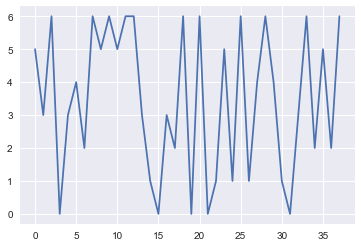

In [14]:
plt.plot(cluster_assignments.view())